# Dados Metereológicos Semanais

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

### Construção de um dataframe com as colunas que representam as variáveis desejadas

In [2]:
#caminho do arquivo csv
file_path = Path(
    '../Dados/Dados-Metereologicos/Diarios/' +\
        'dados_A320_D_A_2008-01-01_2013-12-31.csv'
    )

In [3]:
df = pd.read_csv(file_path,
                 header=9,
                 sep=';', 
                 usecols=
                 ['Data Medicao',
                  'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
                  'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
                  'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)',
                  'TEMPERATURA MINIMA, DIARIA (AUT)(°C)',
                  'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)',
                  'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)' ]
                 )

df.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,2008-01-01,0,"30,7","26,920833","23,1","10,8","2,820833"
1,2008-01-02,0,"30,6","27,054167","25,1","8,8","2,770833"
2,2008-01-03,0,"30,7","27,170833","24,4","11,4","3,704167"
3,2008-01-04,",2","30,4","27,383333","25,8","11,5","3,2625"
4,2008-01-05,0,"30,4","27,25","25,5","10,2","2,833333"


A coluna "Data Medicao" é composta por strings, então há a necessidade de transformar para Datetime e logo após transformar essa coluna, em uma coluna de índices

In [4]:
#transformando a coluna Data Medicao para o formato Datetime

df['Data Medicao'] = pd.to_datetime(df['Data Medicao'])
df.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,2008-01-01,0,"30,7","26,920833","23,1","10,8","2,820833"
1,2008-01-02,0,"30,6","27,054167","25,1","8,8","2,770833"
2,2008-01-03,0,"30,7","27,170833","24,4","11,4","3,704167"
3,2008-01-04,",2","30,4","27,383333","25,8","11,5","3,2625"
4,2008-01-05,0,"30,4","27,25","25,5","10,2","2,833333"


In [5]:
#transformando a coluna Data Medicao em índices

df.set_index('Data Medicao', inplace=True)
df.head()

,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
Data Medicao,,,,,,
2008-01-01,0,"30,7","26,920833","23,1","10,8","2,820833"
2008-01-02,0,"30,6","27,054167","25,1","8,8","2,770833"
2008-01-03,0,"30,7","27,170833","24,4","11,4","3,704167"
2008-01-04,",2","30,4","27,383333","25,8","11,5","3,2625"
2008-01-05,0,"30,4","27,25","25,5","10,2","2,833333"


As colunas que possuem valor numérico são strings com a notação diferente para ponto flutuante, no próximo bloco de códigos é trocado as vírgulas por pontos (ajustando a notação) e retornado um tipo float ao invés de string.

In [6]:
#transformando os dados numéricos de str para float

df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'] =\
    df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'].str.replace(',','.').astype(float)

df['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)'] =\
    df['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)'].str.replace(',','.').astype(float)

df['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'] =\
    df['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].str.replace(',','.').astype(float)
    
df['TEMPERATURA MINIMA, DIARIA (AUT)(°C)'] =\
    df[ 'TEMPERATURA MINIMA, DIARIA (AUT)(°C)'].str.replace(',','.').astype(float)
    
df['VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)'] =\
    df['VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)'].str.replace(',','.').astype(float)
    
df[ 'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)'] =\
    df[ 'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)'].str.replace(',','.').astype(float)

df.head()

,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
Data Medicao,,,,,,
2008-01-01,0.0,30.7,26.920833,23.1,10.8,2.820833
2008-01-02,0.0,30.6,27.054167,25.1,8.8,2.770833
2008-01-03,0.0,30.7,27.170833,24.4,11.4,3.704167
2008-01-04,0.2,30.4,27.383333,25.8,11.5,3.262500
2008-01-05,0.0,30.4,27.250000,25.5,10.2,2.833333


### Divisão em dataframes para cada variável contendo os dados semanais

Nessa próxima parte do código o dataframe é dividido entre dataframes menores contendo unicamente dados que envolvem:

    - Temperatura;
    - Chuva;
    - Vento.

#### Temperatura

In [7]:
#Criando o dataframe das temperaturas com as colunas desejadas
df_temp = pd.DataFrame(columns = 
                       ['TEMPERATURA MEDIA SEMANAL (°C)',
                        'TEMPERATURA MAXIMA SEMANAL (°C)',
                        'TEMPERATURA MINIMA SEMANAL (°C)' ] 
                       )

#Coluna média semanal é a média das temperaturas médias diárias
df_temp['TEMPERATURA MEDIA SEMANAL (°C)']=\
    df['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].resample('W-SUN').mean()

#Coluna máxima semanal é o valor máximo das temperaturas máximas diárias    
df_temp['TEMPERATURA MAXIMA SEMANAL (°C)']=\
    df['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)'].resample('W-SUN').max()
    
#Coluna mínima semanal é o valor mínimo das temperaturas mínimas diárias 
df_temp['TEMPERATURA MINIMA SEMANAL (°C)']=\
    df['TEMPERATURA MINIMA, DIARIA (AUT)(°C)'].resample('W-SUN').min()

df_temp.head()

,TEMPERATURA MEDIA SEMANAL (°C),TEMPERATURA MAXIMA SEMANAL (°C),TEMPERATURA MINIMA SEMANAL (°C)
Data Medicao,,,
2008-01-06,27.124306,30.7,23.1
2008-01-13,27.095238,30.9,23.4
2008-01-20,26.478571,30.8,22.7
2008-01-27,27.649405,31.1,25.5
2008-02-03,27.166071,31.4,23.0


#### Chuva

In [8]:
#Criando o dataframe dos dados de precipitação total
df_chuva = pd.DataFrame(columns=['PRECIPITACAO TOTAL, SEMANAL (mm)'])

#Coluna precipitação semanal é a soma das precipitações diárias
df_chuva['PRECIPITACAO TOTAL, SEMANAL (mm)'] =\
    df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'].resample('W-SUN').sum()

df_chuva.head()

,"PRECIPITACAO TOTAL, SEMANAL (mm)"
Data Medicao,
2008-01-06,0.2
2008-01-13,8.8
2008-01-20,42.0
2008-01-27,1.4
2008-02-03,42.2


#### Velocidade do Vento

In [9]:
#Criando o dataframe dos dados do vento
df_vento = pd.DataFrame(columns=
                        ['VENTO, RAJADA MAXIMA SEMANAL (m/s)',
                         'VENTO, VELOCIDADE MEDIA SEMANAL (m/s)']
                        )

#Rajada Max. Semanal será o valor máximo das rajadas diárias
df_vento['VENTO, RAJADA MAXIMA SEMANAL (m/s)'] =\
    df['VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)'].resample('W-SUN').max()

#Velocidade média semanal será a média das velocidades médias diárias
df_vento['VENTO, VELOCIDADE MEDIA SEMANAL (m/s)'] =\
    df['VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)'].resample('W-SUN').mean()

df_vento.head()

,"VENTO, RAJADA MAXIMA SEMANAL (m/s)","VENTO, VELOCIDADE MEDIA SEMANAL (m/s)"
Data Medicao,,
2008-01-06,11.7,3.075694
2008-01-13,10.8,2.234524
2008-01-20,11.2,2.041071
2008-01-27,9.6,2.094048
2008-02-03,9.7,2.015476


### Divisão dos dataframes semanais para cada ano

In [10]:
#dividindo os dados da temperatura por anos
df_temp_08 = df_temp.loc[df_temp.index.year == 2008]
df_temp_09 = df_temp.loc[df_temp.index.year == 2009]
df_temp_10 = df_temp.loc[df_temp.index.year == 2010]
df_temp_11 = df_temp.loc[df_temp.index.year == 2011]
df_temp_12 = df_temp.loc[df_temp.index.year == 2012]
df_temp_13 = df_temp.loc[df_temp.index.year == 2013]

#dividindo os dados da chuva por anos
df_chuva_08 = df_chuva.loc[df_chuva.index.year == 2008]
df_chuva_09 = df_chuva.loc[df_chuva.index.year == 2009]
df_chuva_10 = df_chuva.loc[df_chuva.index.year == 2010]
df_chuva_11 = df_chuva.loc[df_chuva.index.year == 2011]
df_chuva_12 = df_chuva.loc[df_chuva.index.year == 2012]
df_chuva_13 = df_chuva.loc[df_chuva.index.year == 2013]


#dividindo os dados do vento por anos
df_vento_08 = df_vento.loc[df_vento.index.year == 2008]
df_vento_09 = df_vento.loc[df_vento.index.year == 2009]
df_vento_10 = df_vento.loc[df_vento.index.year == 2010]
df_vento_11 = df_vento.loc[df_vento.index.year == 2011]
df_vento_12 = df_vento.loc[df_vento.index.year == 2012]
df_vento_13 = df_vento.loc[df_vento.index.year == 2013]


#### Transformando os índices semanais de cada ano

Ao aplicarmos o método reset_index, o índice retorna para o padrão (número referente a linha, começando em zero). Usando o método com o parâmetro drop=True, a coluna que anteriormente estava sendo utilizada como índice, é apagada. Por padrão drop=False. 

In [ ]:

#Temperatura
df_temp_08.reset_index(inplace=True, drop=True)
df_temp_09.reset_index(inplace=True, drop=True)
df_temp_10.reset_index(inplace=True, drop=True) 
df_temp_11.reset_index(inplace=True, drop=True)
df_temp_12.reset_index(inplace=True, drop=True)
df_temp_13.reset_index(inplace=True, drop=True)

#Chuva
df_chuva_08.reset_index(inplace=True, drop=True)
df_chuva_09.reset_index(inplace=True, drop=True) 
df_chuva_10.reset_index(inplace=True, drop=True)
df_chuva_11.reset_index(inplace=True, drop=True)
df_chuva_12.reset_index(inplace=True, drop=True)
df_chuva_13.reset_index(inplace=True, drop=True)

#Vento

df_vento_08.reset_index(inplace=True, drop=True)
df_vento_09.reset_index(inplace=True, drop=True)
df_vento_10.reset_index(inplace=True, drop=True)
df_vento_11.reset_index(inplace=True, drop=True)
df_vento_12.reset_index(inplace=True, drop=True)
df_vento_13.reset_index(inplace=True, drop=True)

### Gráficos por variável

Text(0.5, 1.0, 'Ano de 2013')

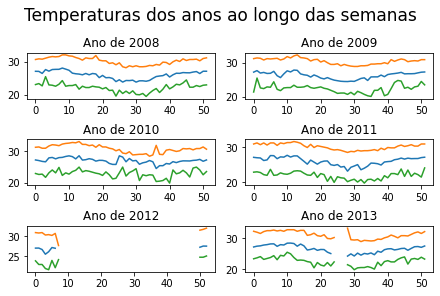

In [15]:
#plotar gráficos temperatura:
    
fig1, f1_axes = plt.subplots(ncols=2, nrows=3, constrained_layout=True)

fig1.suptitle('Temperaturas dos anos ao longo das semanas',size=17)

f1_axes[0,0].plot(df_temp_08)
f1_axes[0,0].set_title('Ano de 2008')

f1_axes[0,1].plot(df_temp_09)
f1_axes[0,1].set_title('Ano de 2009')

f1_axes[1,0].plot(df_temp_10)
f1_axes[1,0].set_title('Ano de 2010')
           
f1_axes[1,1].plot(df_temp_11)
f1_axes[1,1].set_title('Ano de 2011')

f1_axes[2,0].plot(df_temp_12)
f1_axes[2,0].set_title('Ano de 2012')

f1_axes[2,1].plot(df_temp_13)
f1_axes[2,1].set_title('Ano de 2013')

Text(0.5, 1.0, 'Ano de 2013')

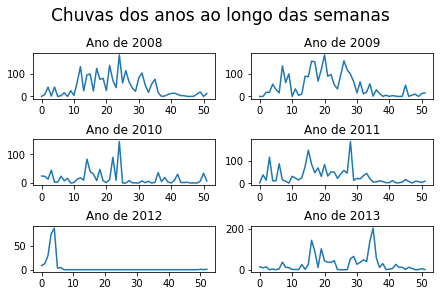

In [12]:
#Gráfico das chuvas
fig2, f2_axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True)

fig2.suptitle('Chuvas dos anos ao longo das semanas',size=17)

f2_axes[0,0].plot(df_chuva_08)
f2_axes[0,0].set_title('Ano de 2008')

f2_axes[0,1].plot(df_chuva_09)
f2_axes[0,1].set_title('Ano de 2009')

f2_axes[1,0].plot(df_chuva_10)
f2_axes[1,0].set_title('Ano de 2010')
           
f2_axes[1,1].plot(df_chuva_11)
f2_axes[1,1].set_title('Ano de 2011')

f2_axes[2,0].plot(df_chuva_12)
f2_axes[2,0].set_title('Ano de 2012')

f2_axes[2,1].plot(df_chuva_13)
f2_axes[2,1].set_title('Ano de 2013')

Text(0.5, 1.0, 'Ano de 2013')

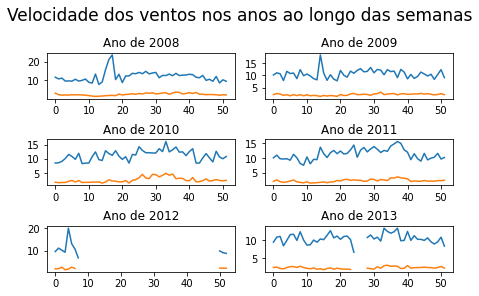

In [13]:
#Gráficos da velocidade do vento
fig3, f3_axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True)

fig3.suptitle('Velocidade dos ventos nos anos ao longo das semanas',size=17)

f3_axes[0,0].plot(df_vento_08)
f3_axes[0,0].set_title('Ano de 2008')

f3_axes[0,1].plot(df_vento_09)
f3_axes[0,1].set_title('Ano de 2009')

f3_axes[1,0].plot(df_vento_10)
f3_axes[1,0].set_title('Ano de 2010')
           
f3_axes[1,1].plot(df_vento_11)
f3_axes[1,1].set_title('Ano de 2011')

f3_axes[2,0].plot(df_vento_12)
f3_axes[2,0].set_title('Ano de 2012')

f3_axes[2,1].plot(df_vento_13)
f3_axes[2,1].set_title('Ano de 2013')